# 1197번 최소 스패닝 트리 - Gold 4

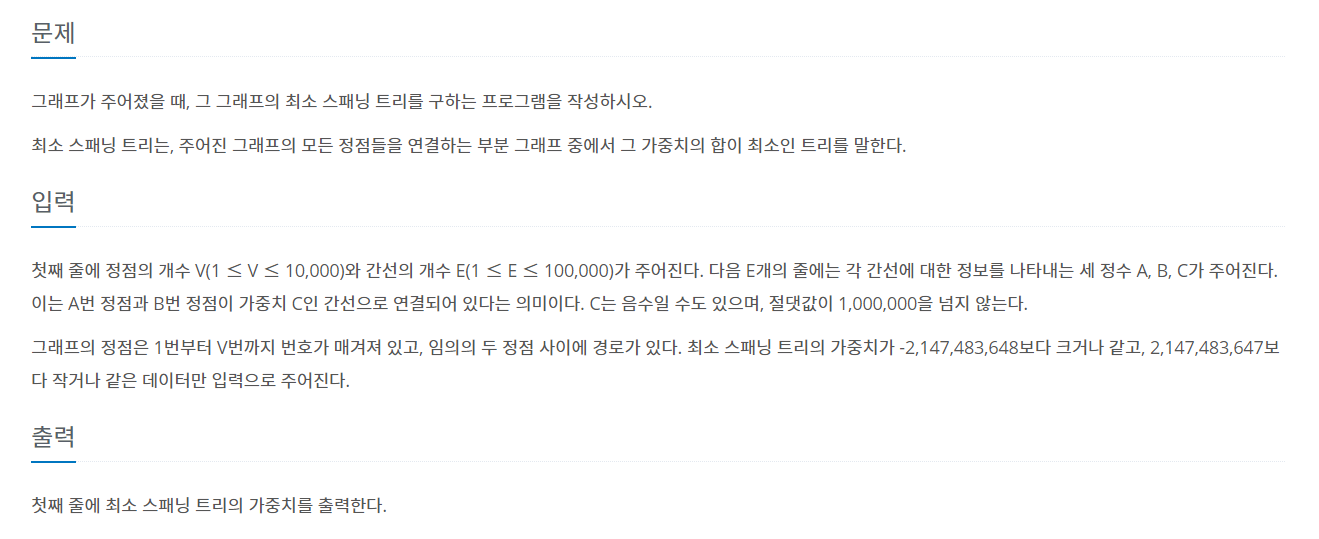

In [ ]:
n,m = map(int,input().split())
import sys
input = sys.stdin.readline
edges =[]
for i in range(m):
    a, b, c = map(int,(input().split()))
    edges.append((c,a,b))
parent = {}
rank = {}

# 정점을 독립적인 집합으로 만든다.
def make_set(v):
    parent[v] = v
    rank[v] = 0

def find(v):
    if parent[v] != v:
        parent[v] = find(parent[v])
    return parent[v]


def union(v, u):
    root1 = find(v)
    root2 = find(u)

    if root1 != root2:
        # 짧은 트리의 루트가 긴 트리의 루트를 가리키게 만드는 것이 좋다.
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2

            if rank[root1] == rank[root2]:
                rank[root2] += 1


def kruskal(edges):
    for i in range(1,n+1):
        make_set(i)

    mst = 0

    edges.sort(key=lambda x :x[0])

    for edge in edges:
        weight,v,u = edge

        if find(v) != find(u):
            union(v, u)
            mst += weight

    return mst
print(kruskal(edges))